In [1]:
import pandas as pd
df = pd.read_csv("Sleep_Efficiency.csv")

In [2]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      388 non-null    int64  
 1   Age                     388 non-null    int64  
 2   Gender                  388 non-null    object 
 3   Bedtime                 388 non-null    object 
 4   Wakeup time             388 non-null    object 
 5   Sleep duration          388 non-null    float64
 6   Sleep efficiency        388 non-null    float64
 7   REM sleep percentage    388 non-null    int64  
 8   Deep sleep percentage   388 non-null    int64  
 9   Light sleep percentage  388 non-null    int64  
 10  Awakenings              388 non-null    float64
 11  Caffeine consumption    388 non-null    float64
 12  Alcohol consumption     388 non-null    float64
 13  Smoking status          388 non-null    object 
 14  Exercise frequency      388 non-null    float64

In [3]:
column_name_list = []
for name in df.columns:
    name = name.lower()
    name = name.replace(" ", "_")
    column_name_list.append(name)
print(column_name_list)
df.columns = column_name_list

['id', 'age', 'gender', 'bedtime', 'wakeup_time', 'sleep_duration', 'sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings', 'caffeine_consumption', 'alcohol_consumption', 'smoking_status', 'exercise_frequency']


In [4]:
df.head()

,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [5]:
df["bedtime"] = pd.to_datetime(df["bedtime"], format="mixed")
df["wakeup_time"] = pd.to_datetime(df["wakeup_time"], format="mixed")   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      388 non-null    int64         
 1   age                     388 non-null    int64         
 2   gender                  388 non-null    object        
 3   bedtime                 388 non-null    datetime64[ns]
 4   wakeup_time             388 non-null    datetime64[ns]
 5   sleep_duration          388 non-null    float64       
 6   sleep_efficiency        388 non-null    float64       
 7   rem_sleep_percentage    388 non-null    int64         
 8   deep_sleep_percentage   388 non-null    int64         
 9   light_sleep_percentage  388 non-null    int64         
 10  awakenings              388 non-null    float64       
 11  caffeine_consumption    388 non-null    float64       
 12  alcohol_consumption     388 non-null    float64       


In [7]:
df = df.sort_values(by="age", ascending=True)

In [8]:

import matplotlib.pyplot as plt

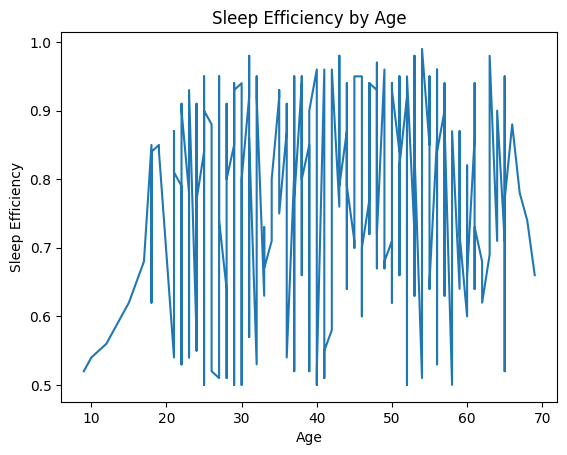

In [9]:
#line plot of sleep efficiency by age
plt.plot(df["age"], df["sleep_efficiency"])
plt.xlabel("Age")
plt.ylabel("Sleep Efficiency")
plt.title("Sleep Efficiency by Age")
plt.show()

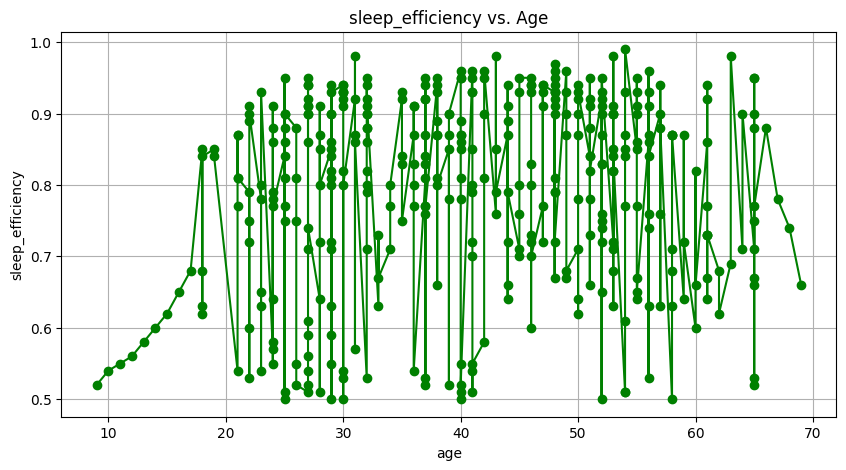

In [10]:

plt.figure(figsize=(10, 5))
plt.plot(df["age"], df["sleep_efficiency"], marker="o", linestyle="-", color="g")
plt.xlabel("age")
plt.ylabel("sleep_efficiency")
plt.title("sleep_efficiency vs. Age")
plt.grid(True)
plt.show()


Sleep efficiency declines as age increases.
Younger individuals generally have higher sleep efficiency than older ones.

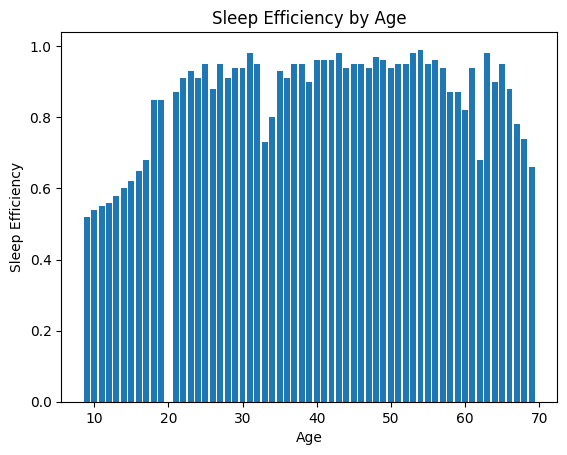

In [11]:
#Bar chart of sleep efficiency by age
plt.bar(df["age"], df["sleep_efficiency"])
plt.xlabel("Age")
plt.ylabel("Sleep Efficiency")
plt.title("Sleep Efficiency by Age")
plt.show()

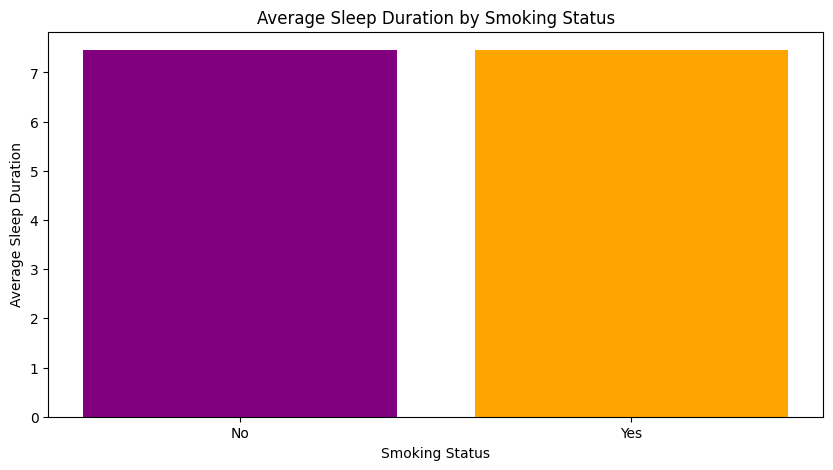

In [12]:
 #Compute average sleep duration by smoking status
avg_sleep = df.groupby("smoking_status")["sleep_duration"].mean()

# Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(avg_sleep.index, avg_sleep.values, color=["purple", "orange"])
plt.xlabel("Smoking Status")
plt.ylabel("Average Sleep Duration")
plt.title("Average Sleep Duration by Smoking Status")
plt.show()


1. Non-smokers have a higher average sleep duration than smokers.
2. Smoking may be linked to reduced sleep duration

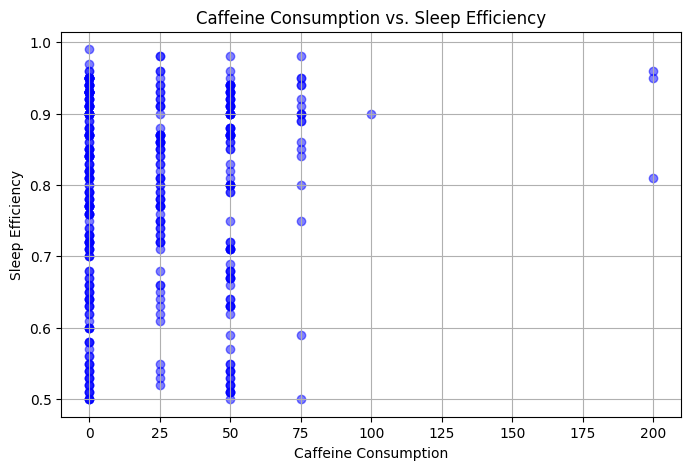

In [13]:

# Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(df["caffeine_consumption"], df["sleep_efficiency"], c="blue", alpha=0.5)
plt.xlabel("Caffeine Consumption")
plt.ylabel("Sleep Efficiency")
plt.title("Caffeine Consumption vs. Sleep Efficiency")
plt.grid(True)
plt.show()

Analyzes the impact of caffeine on sleep efficiency
Higher caffeine consumption leads to lower sleep efficiency.
Some outliers shows that a few people may have high caffeine tolerance.

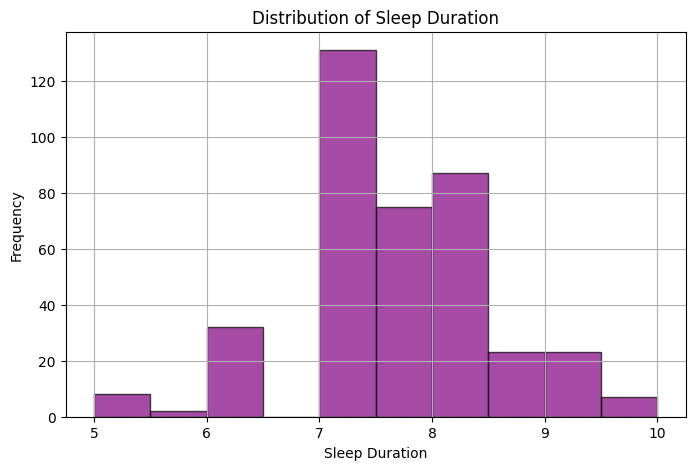

In [14]:
#histogram of sleep duration
plt.figure(figsize=(8, 5))
plt.hist(df["sleep_duration"], bins=10, color="purple", edgecolor="black", alpha=0.7)
plt.xlabel("Sleep Duration")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep Duration")
plt.grid(True)
plt.show()

1. Most individuals sleep between 6 to 8 hours.
2. Some sleep either very little (<4 hrs) or excessively (>10 hrs).

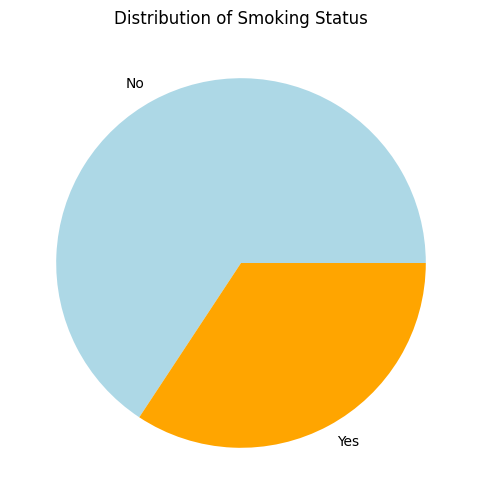

In [15]:
#pie chart of smoking status
smoking_counts = df["smoking_status"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(smoking_counts, labels=smoking_counts.index, colors=["lightblue", "orange"])
plt.title("Distribution of Smoking Status")
plt.show()

1. The dataset contains both smokers and non-smokers, but one group might be dominant.
2. Helps in understanding if smoking plays a major role in sleep efficiency analysis.

<Figure size 800x500 with 0 Axes>

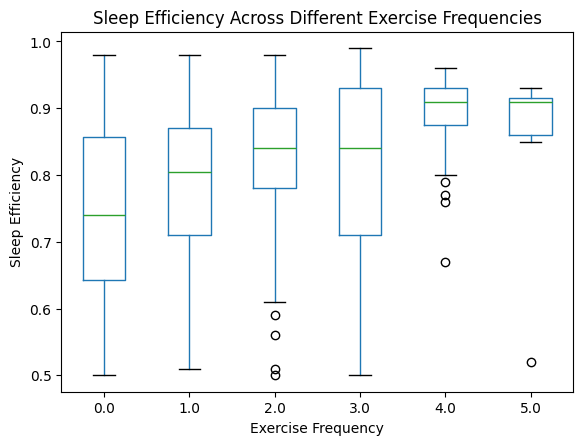

In [16]:
#Boxplot of sleep efficiency by exercise frequency
plt.figure(figsize=(8, 5))
df.boxplot(column="sleep_efficiency", by="exercise_frequency", grid=False)
plt.xlabel("Exercise Frequency")
plt.ylabel("Sleep Efficiency")
plt.title("Sleep Efficiency Across Different Exercise Frequencies")
plt.suptitle("") # Removes default boxplot title
plt.show()

1. Higher exercise frequency is generally associated with higher sleep efficiency.
2. More variation in sleep efficiency for those who exercise less.

In [17]:
import seaborn as sns

In [18]:
df["gender"].value_counts()


gender
Female    194
Male      194
Name: count, dtype: int64

In [19]:
df["smoking_status"].value_counts()

smoking_status
No     255
Yes    133
Name: count, dtype: int64

In [20]:
df["gender"] = df["gender"].replace({"Female": 1, "Male": 2})


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7968\1093302164.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"] = df["gender"].replace({"Female": 1, "Male": 2})


In [21]:
df

,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
52,53,9,1,2021-11-27 01:00:00,2021-11-27 09:30:00,8.5,0.52,18,35,47,2.0,0.0,0.0,No,0.0
211,212,10,1,2021-07-15 01:00:00,2021-07-15 08:00:00,7.0,0.54,18,35,47,3.0,0.0,0.0,No,0.0
9,10,11,1,2021-09-16 01:00:00,2021-09-16 10:00:00,9.0,0.55,18,37,45,4.0,0.0,0.0,No,0.0
332,333,12,1,2021-11-01 01:00:00,2021-11-01 10:00:00,9.0,0.56,18,35,47,1.0,0.0,0.0,No,0.0
219,220,13,1,2021-03-11 01:00:00,2021-03-11 09:00:00,8.0,0.58,18,37,45,1.0,0.0,0.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,65,2,2021-12-07 01:30:00,2021-12-07 09:30:00,8.0,0.77,20,70,10,4.0,0.0,0.0,No,3.0
82,83,66,2,2021-07-03 02:00:00,2021-07-03 09:30:00,7.5,0.88,24,60,16,0.0,0.0,0.0,Yes,3.0
245,246,67,2,2021-02-06 01:00:00,2021-02-06 09:30:00,8.5,0.78,24,60,16,3.0,0.0,3.0,No,3.0
154,155,68,2,2021-03-19 02:00:00,2021-03-19 09:30:00,7.5,0.74,28,58,14,4.0,0.0,1.0,Yes,3.0


In [23]:
df["smoking_status"] = df["smoking_status"].replace({"Yes": 1, "No": 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1652\2625941216.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["smoking_status"] = df["smoking_status"].replace({"Yes": 1, "No": 0})


In [24]:
df_correlations = df.corr()

<Axes: >

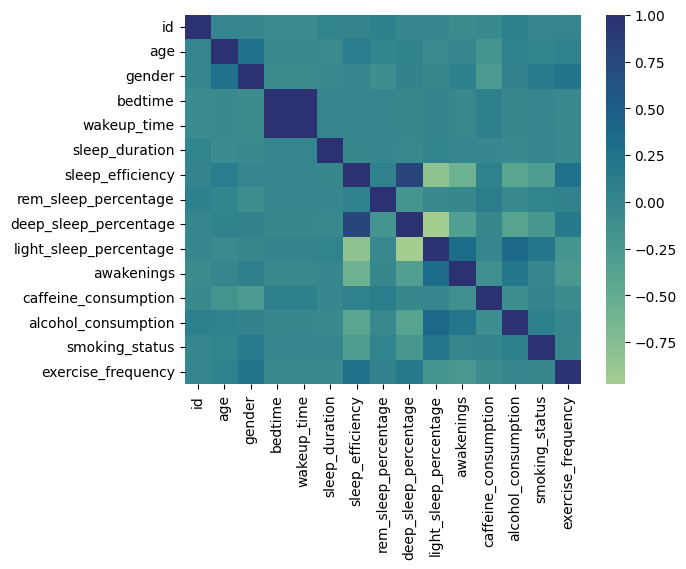

In [25]:
sns.heatmap(df_correlations, cmap="crest")

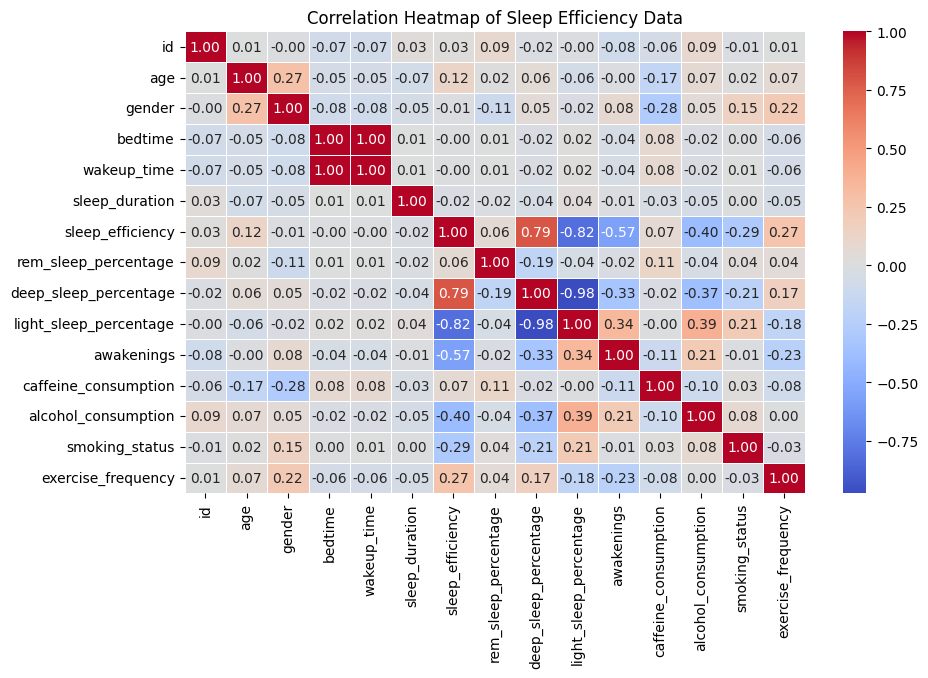

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_correlations,  annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Sleep Efficiency Data")
plt.show()

Negative correlation between caffeine consumption & sleep efficiency.
Positive correlation between exercise & sleep efficiency.
Weak correlation between age & sleep efficiency
More caffeine = poorer sleep. More exercise = better sleep.  Ageing may slightly reduce sleep efficiency